In [2]:
# Set up the environment

# Tell R which libraries you need. These should all run here, but if using your own R environment 
# you may have to install any libraries not previously installed.


# Libraries

library(ggplot2)



# normally you would import your own data here, but for the sake of time we are using a pre-loaded dataset.

data(diamonds)   # Load data

head(diamonds)  # peak at first few rows of data


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [2]:
# Let's get some descriptives from this dataset
# The summary will give us some descriptives for continuous variables and counts for discrete variables

summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

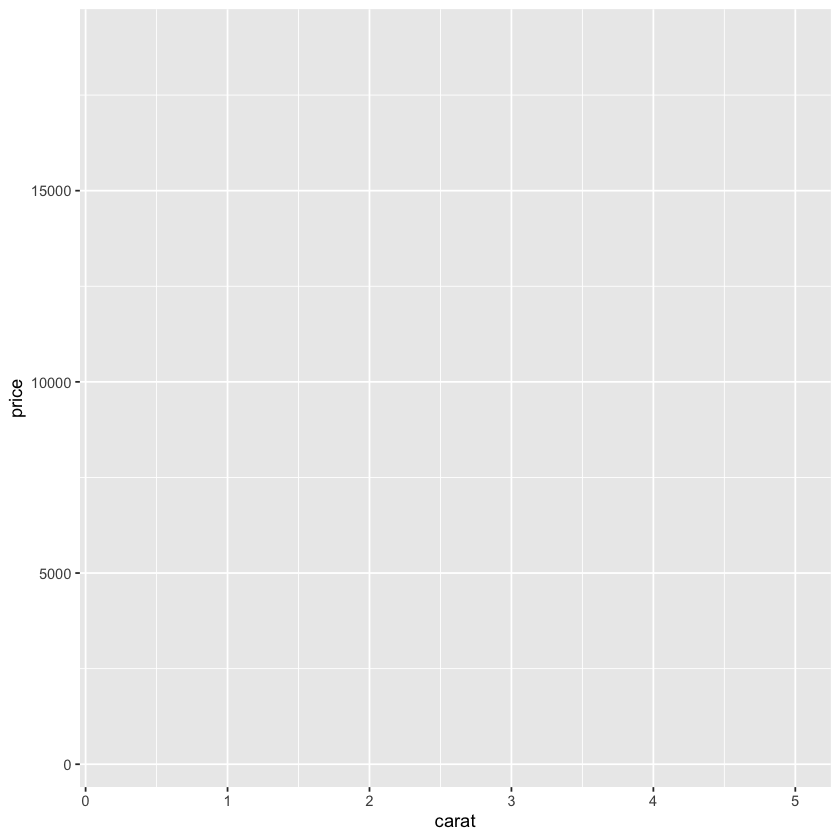

In [3]:
# Setting up ggplot

# First we need to specify which dataset we would like to graph and what variables to use for the X and Y axes
# The code will follow this format: 
# ggplot(DATASET, aes(x = XVARIABLE, y = YVARIABLE))
# This can get more complicated, but for now we'll keep it simple. 

# We'll look at a few continuous variables first

ggplot(diamonds, aes(x = carat, y = price))

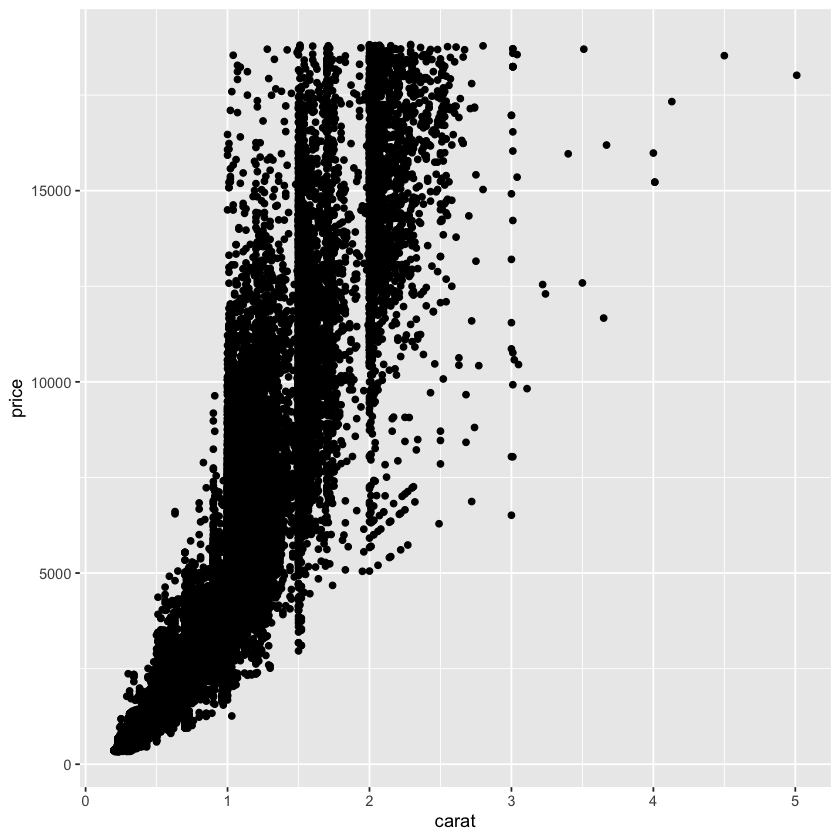

In [4]:
# Okay... but it's empty

# We have to specify how the data should be represented, or in other words which geom. 
# We'll start with a scatterplot, showing 2 dimensions of the data

ggplot(diamonds, aes(x = carat, y = price)) +
geom_point()

<ggproto object: Class FacetGrid, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetGrid, Facet, gg>

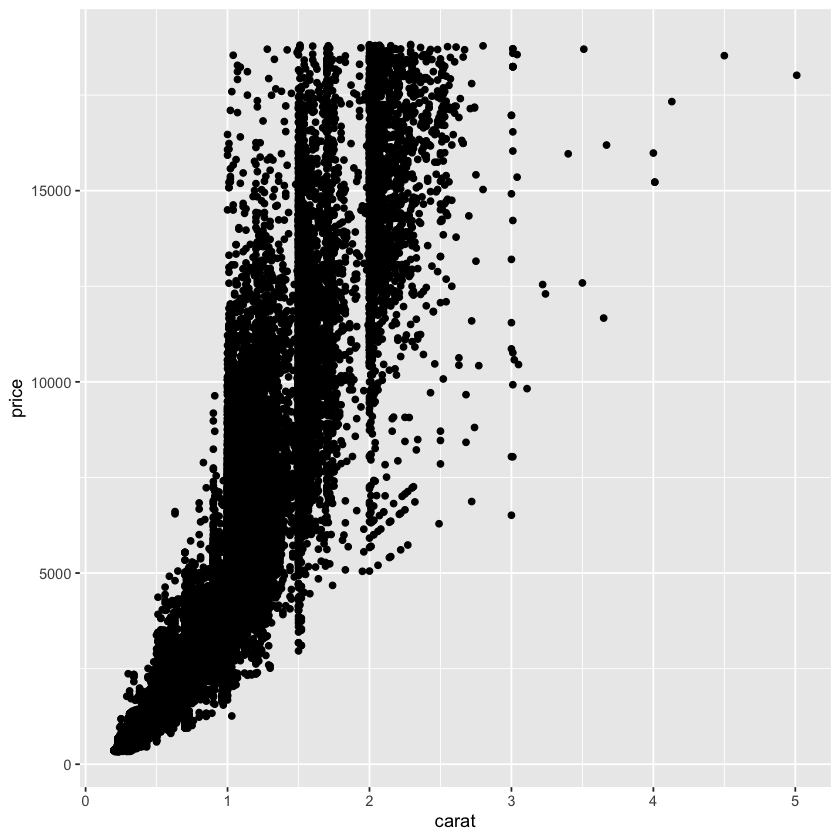

In [5]:
# That's pretty hard to look at. Let's see if we can clarify the plot and make sense of some patterns.

# Because there are so many data points it might be helpful to split the graphs by some other variable we think make sense.

ggplot(diamonds, aes(x = carat, y = price)) +
geom_point()
facet_grid(cut~.) # Separate by the diamond's cut 

In [34]:
# Notice that each time I want to add a new aspect to the graph I re-write the entire code. 
# You can definitely do this if it is easier for you to understand, but you can also make the base code a variable
# and only write one line at a time. 

# For example

plot <- ggplot(diamonds, aes(x = carat, y = price))

plot <- plot + 
geom_point(aes(colour = clarity)) +
facet_grid(cut~.)

# For clarity I will continue to show the entire code, though. 

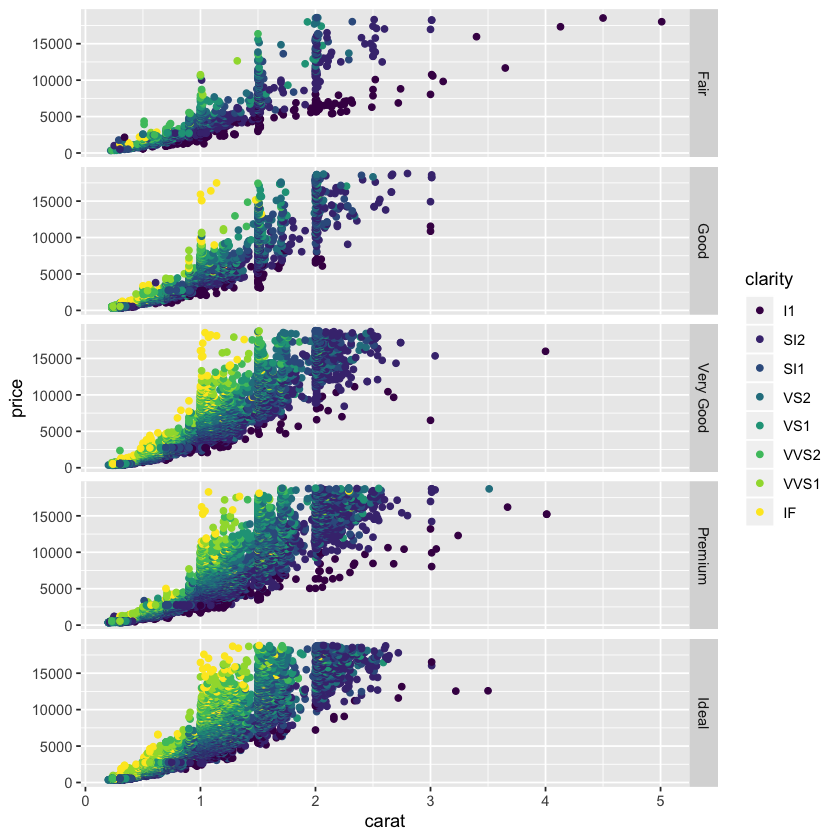

In [35]:
plot

In [72]:
my.colors <- c("red","blue","green","yellow","orange","grey","pink","purple")



ggplot(diamonds, aes(x = carat, y = price)) +
geom_point(alpha = 0.50) +
facet_grid(cut~.) +
labs(title = "Diamond Price by Carat and Cut", 
     x = "Carat",
     y = "Price(USD)") +
theme_bw() +
theme(
plot.title = element_text(hjust = 0.5), 
x.title = element_text(face = "bold"))


ERROR: Error in (function (el, elname) : "x.title" is not a valid theme element name.


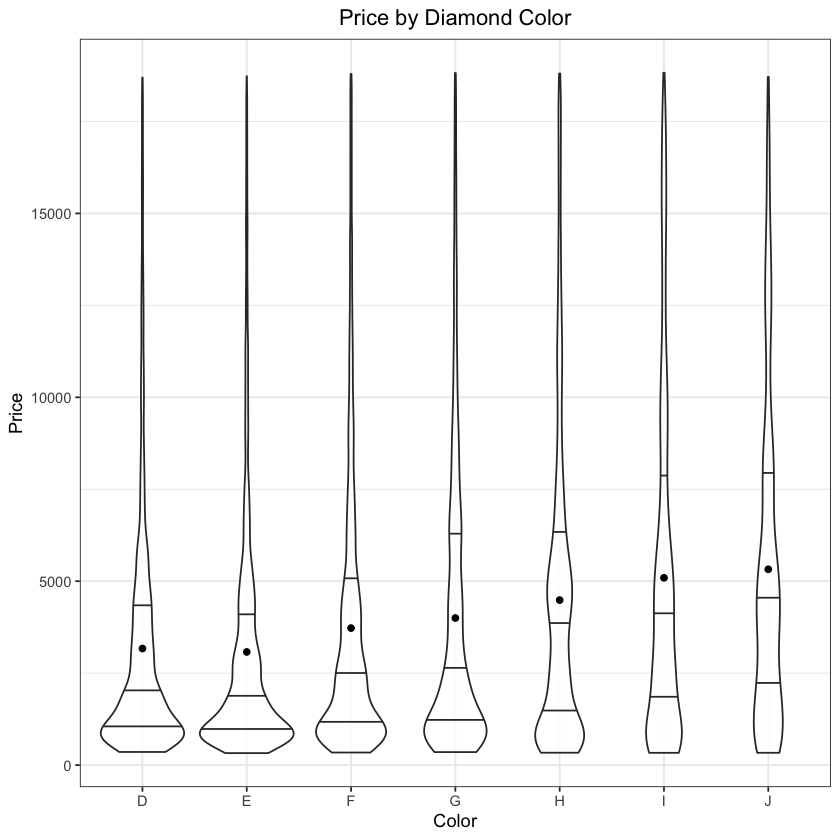

In [31]:


ggplot(diamonds, aes(x = color, y = price)) +
scale_colour_hue(h = c(90, 180)) +
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), 
            alpha = .85) +
stat_summary(fun.y=mean, geom='point') +
labs(title ="Price by Diamond Color", x = "Color", y = "Price") +
scale_fill_discrete(name = "Color", labels = c("Best", " ", " "," "," "," ","Worst")) +
#guides(shape = guide_legend(override.aes = list(size = 2))) +
theme_bw() +
theme(
plot.title = element_text(hjust = 0.5),
legend.text = element_text(size = 8))




In [26]:
ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species)) +
labs(title = "Petal Width & Length by Iris Species",
     x = "Petal Length (cm)",
     y = "Petal Width (cm)") +
scale_x_continuous(labels = scales::number_format(accuracy = 0.1)) +
theme_bw() +
theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
      x.title = element_text(face = "bold", size = 10))

ERROR: Error in parse(text = x, srcfile = src): <text>:10:0: unexpected end of input
8: theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
9:       x.title = element_text(face = "bold", size = 10)
  ^


In [8]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
